<a href="https://colab.research.google.com/github/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/blob/main/Actividad_4/Actividad_4_1_GallardoFelipe_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Felipe Gallardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


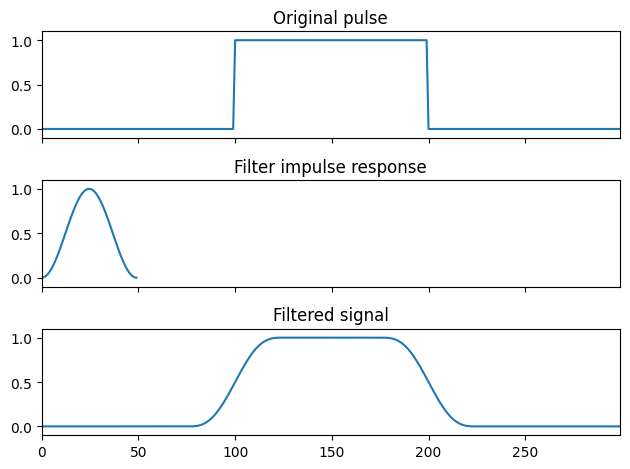

In [ ]:
import numpy as np
from scipy import signal
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

import matplotlib.pyplot as plt
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

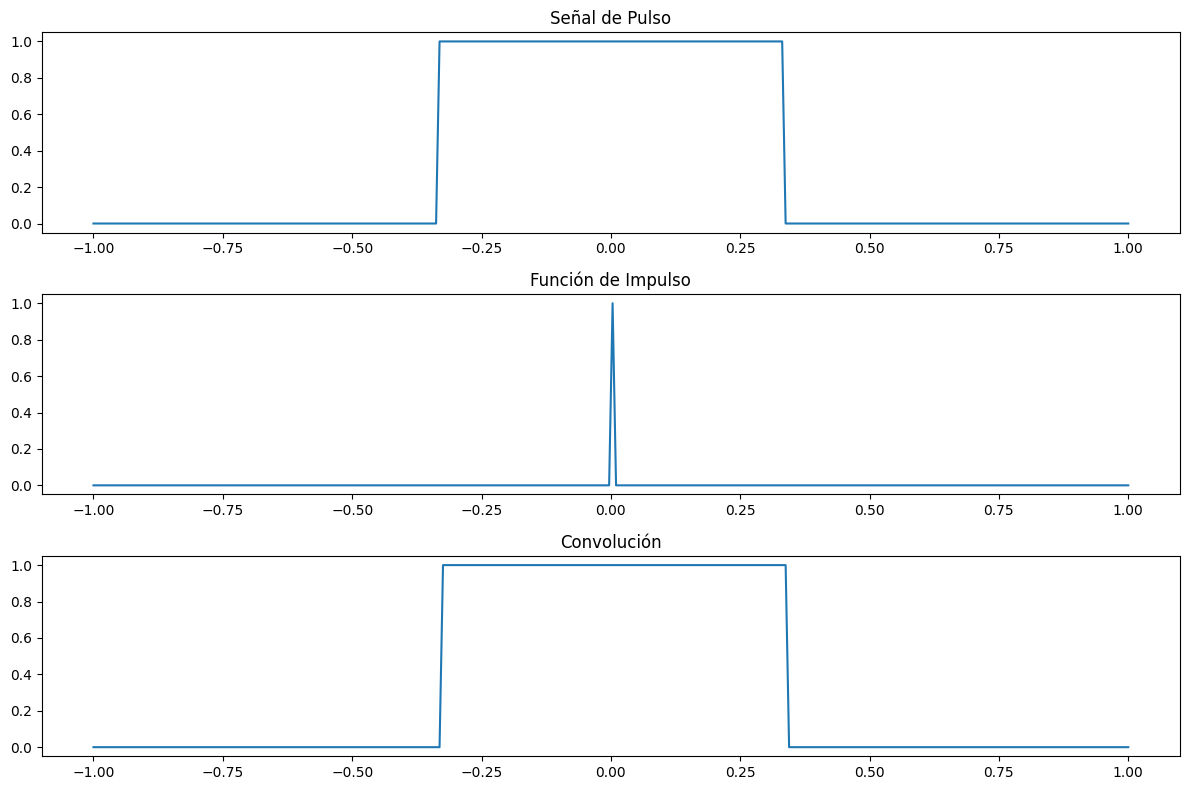

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Crear la señal de pulso
sig = np.repeat([0, 1, 0], 100)

# Crear la señal de impulso
imp = np.zeros(len(sig))
imp[len(sig)//2] = 1  # El impulso está en el punto medio

# Realizar la convolución
conv = signal.convolve(sig, imp, mode='same') / sum(imp)

# Crear un array de tiempo
t = np.linspace(-1, 1, len(sig))

# Graficar la señal de pulso, la función de impulso y la convolución
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.title('Señal de Pulso')
plt.subplot(3, 1, 2)
plt.plot(t, imp)
plt.title('Función de Impulso')
plt.subplot(3, 1, 3)
plt.plot(t, conv)
plt.title('Convolución')
plt.tight_layout()
plt.show()

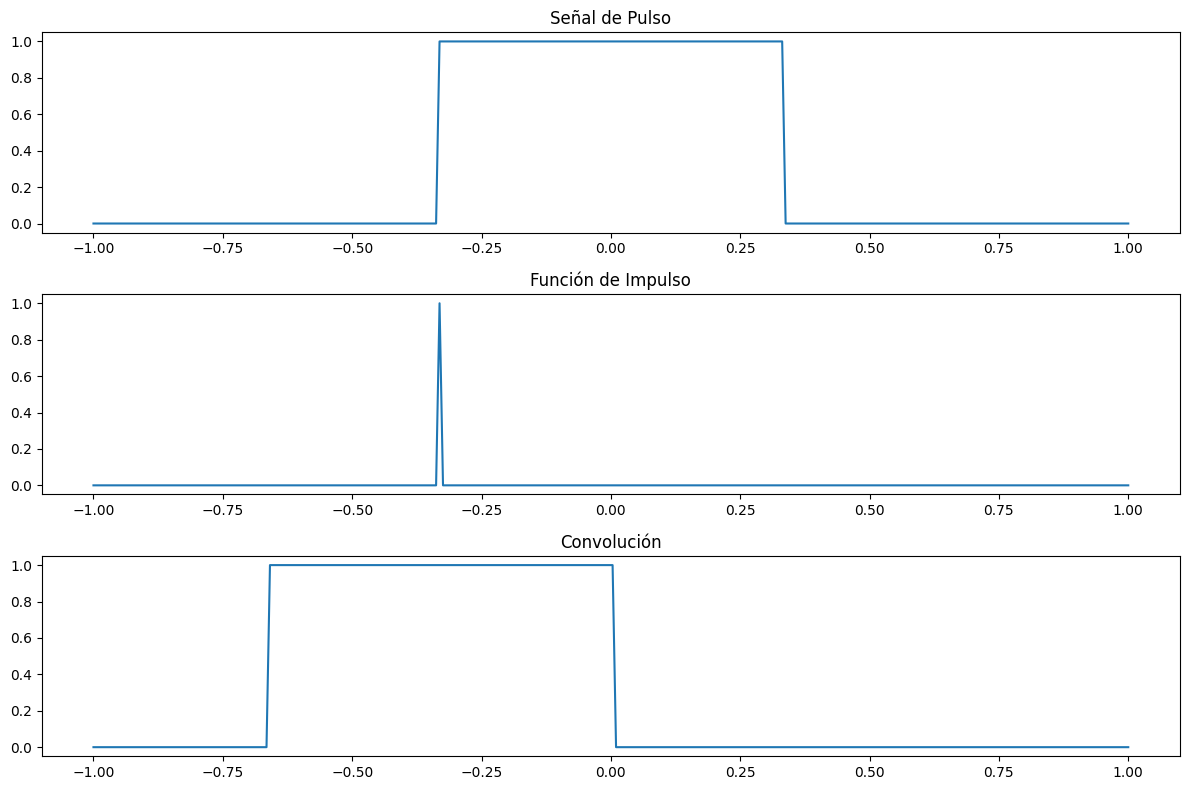

In [ ]:
# Señal de pulso
def pulso(n):
    return [1 if n <= i < 2*n else 0 for i in range(3*n)]

# Señal de impulso
def impulso(n):
    return [0 if i != n else 1 for i in range(3*n)]

n = 100
sig = pulso(n)
imp = impulso(n)

# Convolución
conv = signal.convolve(sig, imp, mode='same') / sum(imp)

# Crear un array de tiempo
t = np.linspace(-1, 1, len(sig))

# Graficar la señal de pulso, la función de impulso y la convolución
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.title('Señal de Pulso')
plt.subplot(3, 1, 2)
plt.plot(t, imp)
plt.title('Función de Impulso')
plt.subplot(3, 1, 3)
plt.plot(t, conv)
plt.title('Convolución')
plt.tight_layout()
plt.show()

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


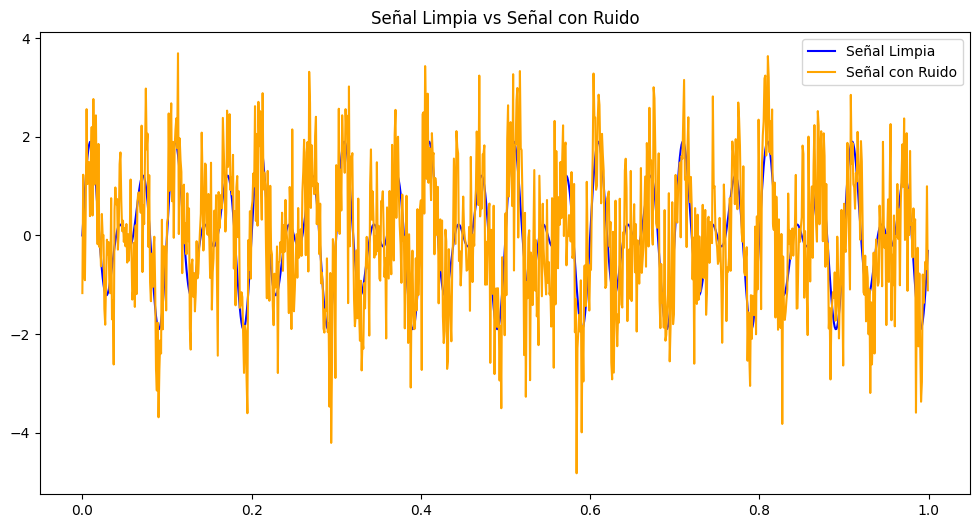

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el tiempo
f1 = 20
f2 = 30
#t = np.linspace(0, 1, 500)
t = np.arange(0, 1, 0.001)
señal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
señal_limpia = señal

#Señal con ruido
ruido = np.random.randn(len(t))
señal_ruido = señal_limpia + ruido

# Graficar la señal limpia y la señal con ruido en la misma gráfica
plt.figure(figsize=(12, 6))
plt.plot(t, señal_limpia, label='Señal Limpia', color='blue')
plt.plot(t, señal_ruido, label='Señal con Ruido', color='orange')
#plt.xlim(t[0], t[-1])
plt.title('Señal Limpia vs Señal con Ruido')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


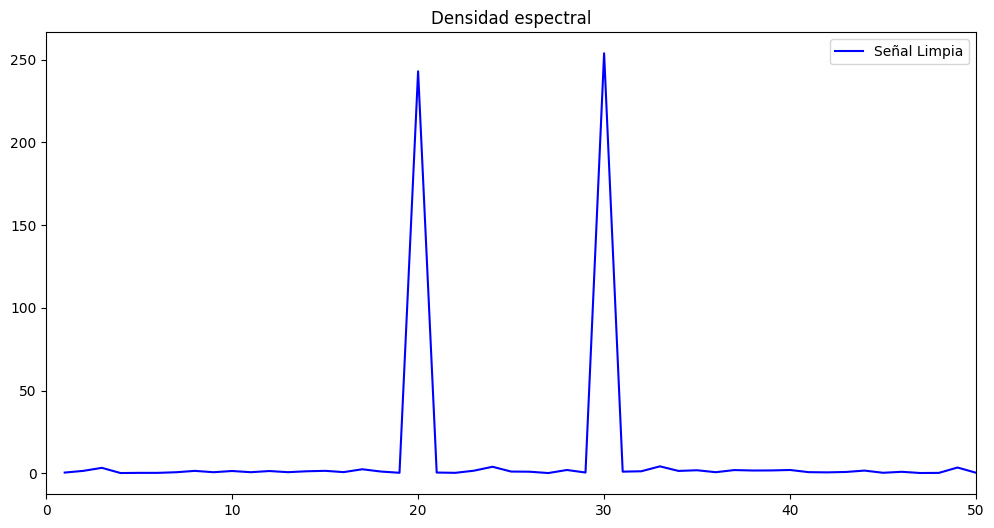

In [ ]:
# densidad espectral PSD
n = len(t)
fhat = np.fft.fft(señal_ruido,n)
psd = fhat * np.conj(fhat) / n
freq = (1/(0.001*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype= "int")

#

indice = psd > 100
psd_limpio = psd * indice
fhat = indice * fhat
ffilt = np.fft.ifft(fhat)

#fig,axs = plt.subplots(2,1)
"""
plt.figure(figsize=(12, 6))
plt.plot(t, señal_limpia, label='Señal Limpia', color='blue')
plt.plot(t, señal_ruido, label='Señal con Ruido', color='orange')
plt.title('Señal Limpia vs Señal con Ruido')
plt.legend()
"""
plt.figure(figsize=(12, 6))
plt.plot(freq[L], psd[L], label='Señal Limpia', color='blue')
#plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlim(0, 50)
plt.title('Densidad espectral')
plt.legend()


plt.show()

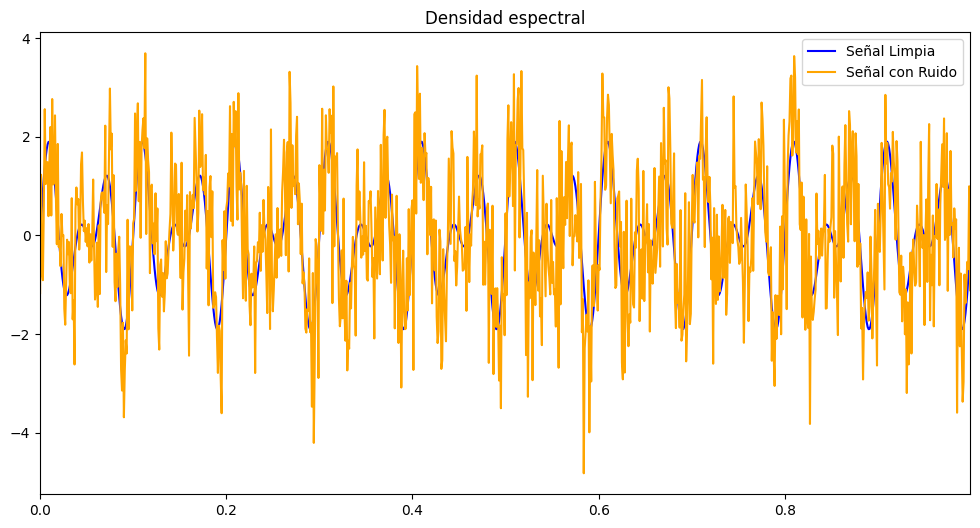

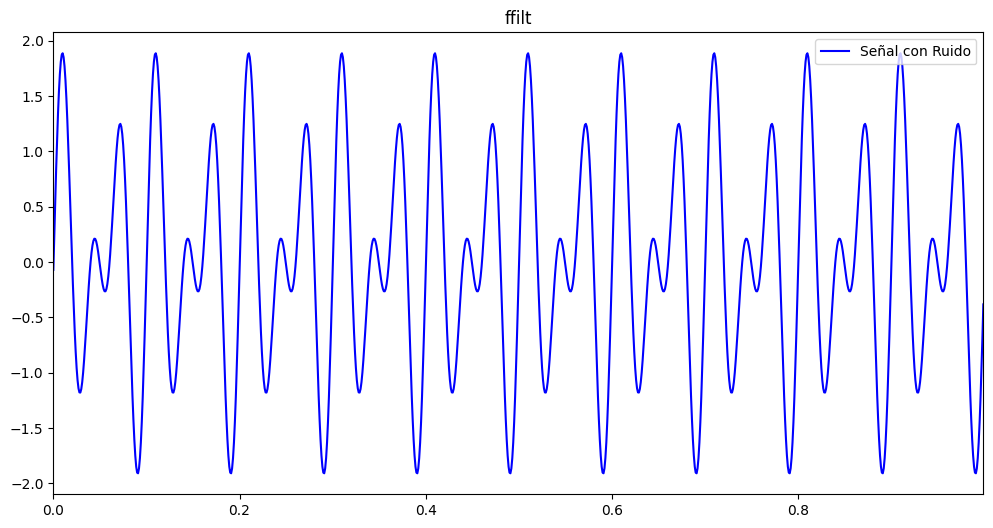

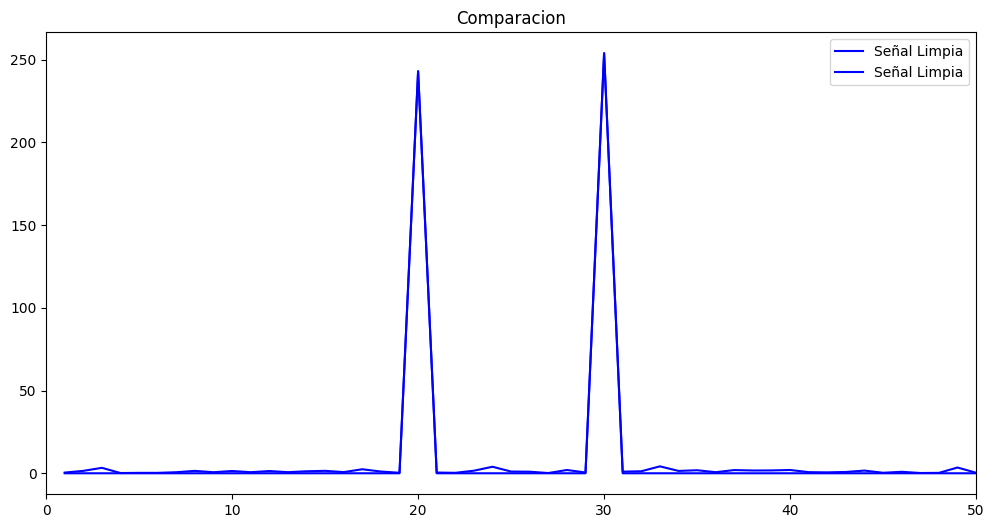

In [ ]:
# Graficas

#fig,axs = plt.subplots(3,1)

plt.figure(figsize=(12, 6))
plt.plot(t, señal_limpia, label='Señal Limpia', color='blue')
plt.plot(t, señal_ruido, label='Señal con Ruido', color='orange')
plt.xlim(t[0], t[-1])
plt.title('Densidad espectral')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(t, ffilt, label='Señal con Ruido', color='blue')
plt.xlim(t[0], t[-1])
plt.title('ffilt')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(freq[L], psd[L], label='Señal Limpia', color='blue')
plt.plot(freq[L], psd_limpio[L], label='Señal Limpia', color='blue')
#plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlim(0, 50)
plt.title('Comparacion')
plt.legend()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):

    return 0


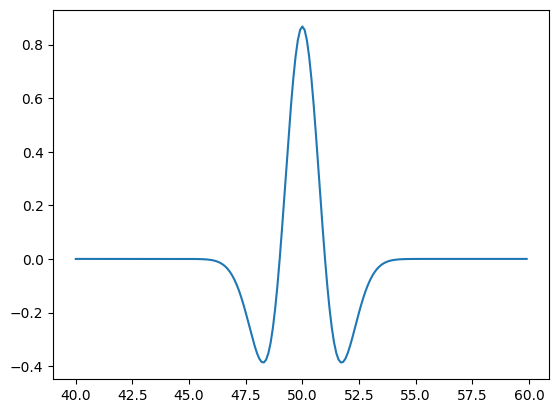

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    # Implementación de la función Mexican Hat Wavelet
    cte = 2/(np.sqrt(3*sigma)*np.pi**0.25)
    x_posicion = x - mu  #mu controla donde esta centrado el sombrero
    parent = 1 - (x_posicion**2)/(sigma**2)
    exp = np.exp(-(x_posicion**2)/(2*sigma**2))
    return cte * parent * exp

# Prueba de la función
x = np.arange(40, 60, 0.1)
y = mexican_hat(x, mu, 1)
mu = 50

plt.plot(x, y)
plt.show()

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

In [ ]:
import numpy as np

def wavelet_transform(signal, a0=2, b0=1, m=1):
    # Definición de la función wavelet
    def psi(t):
        return np.sin(2 * np.pi * t)

    # Definición de la función wavelet escalada y trasladada
    def psi_mn(t, m, n):
        return a0**(-m/2) * psi((t - n * b0 * a0**m) / a0**m)

    # Cálculo de la transformada de wavelet
    Twav = []
    for i in range(len(signal)):
        sumatoria = 0
        for n in range(len(signal)):
            sumatoria += signal[n] * psi_mn(n, m, i)
        Twav.append(sumatoria)

    return Twav

# Definición de la señal de estudio
signal = np.random.normal(size=100)  # Señal aleatoria con ruido

# Cálculo de la transformada de wavelet
Twav = wavelet_transform(signal)

###  3.2.1. Explica el siguiente fragmento de código en detalle

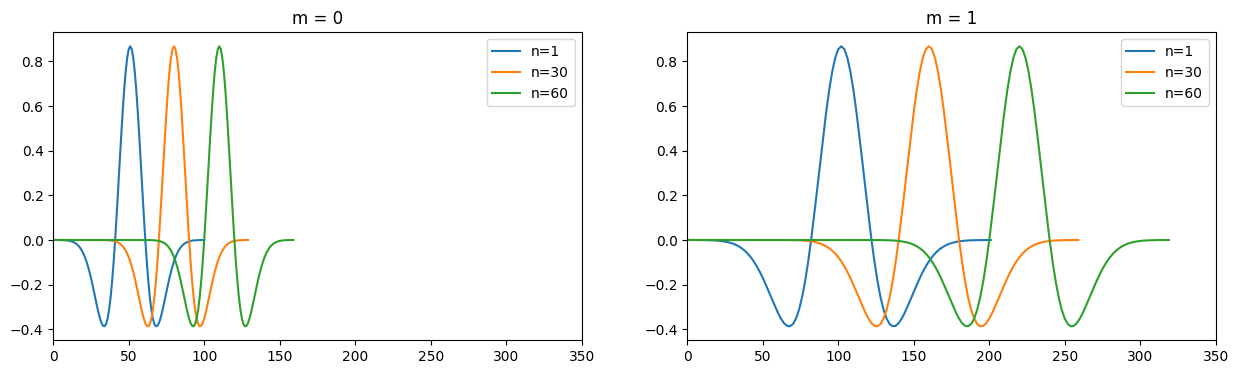

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
"""
Utiliza la funcion del sombrero mexico anterior en distintos rangos y la traslada
"""
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


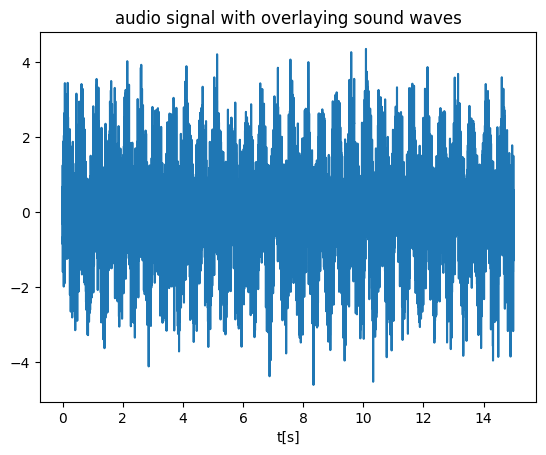

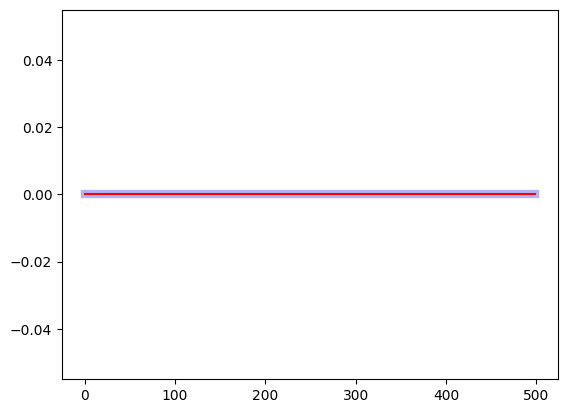

In [ ]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = 0
    transform_scaled =  0
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = 0
    transform = 0
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

In [ ]:
"""
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

# Descargar los datos
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
data = pd.read_csv(url, header=None)
signal = data.values.squeeze()

# Definir la wavelet
wavelet = 'morl'

# Definir las escalas
scales = np.arange(1, 1000)  # Ajusta el rango de escalas aquí

# Calcular la transformada continua de wavelet
[cfs, frequencies] = pywt.cwt(signal, scales, wavelet)

# Convertir a potencia
power = (abs(cfs)) ** 2

# Graficar el resultado
plt.figure(figsize=(12, 6))
plt.contourf(power, extend='both', cmap='viridis')
plt.title('Wavelet Power Spectrum')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.colorbar(label='Power')
plt.show()
"""

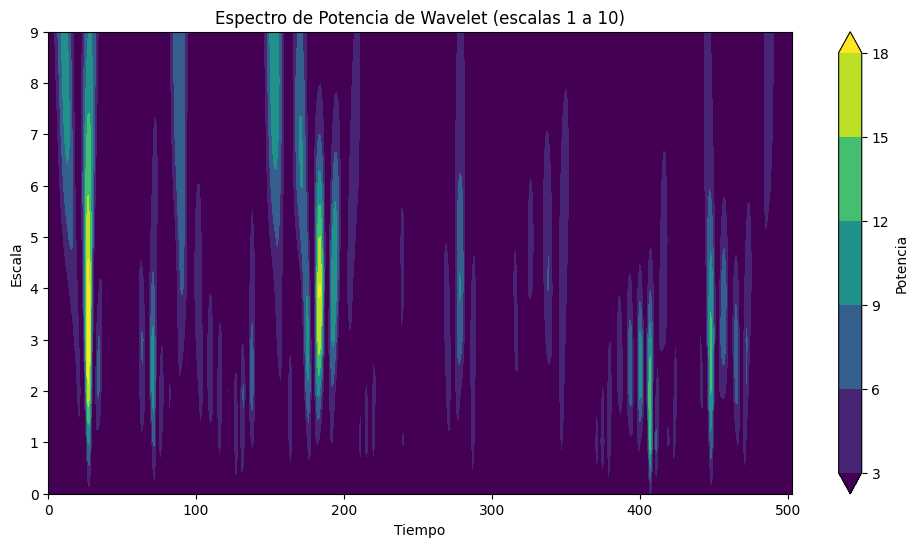

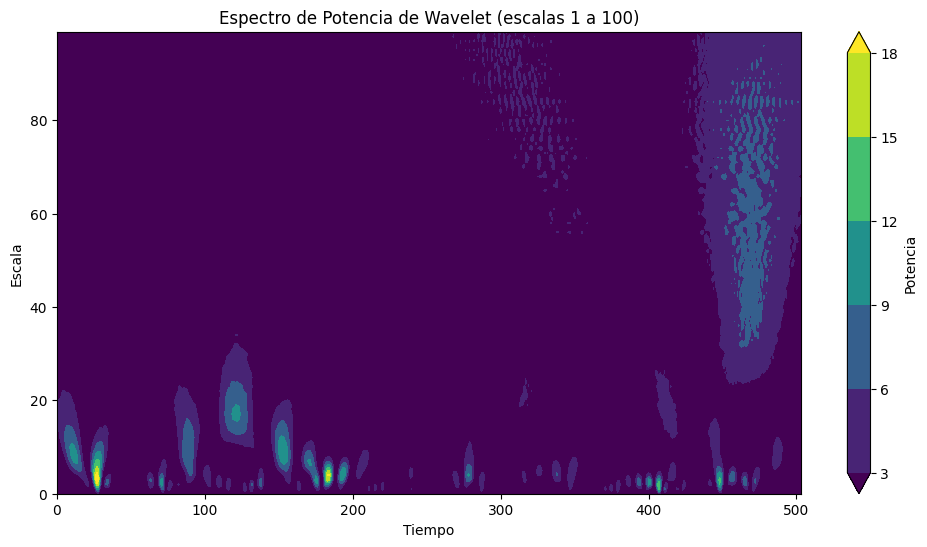

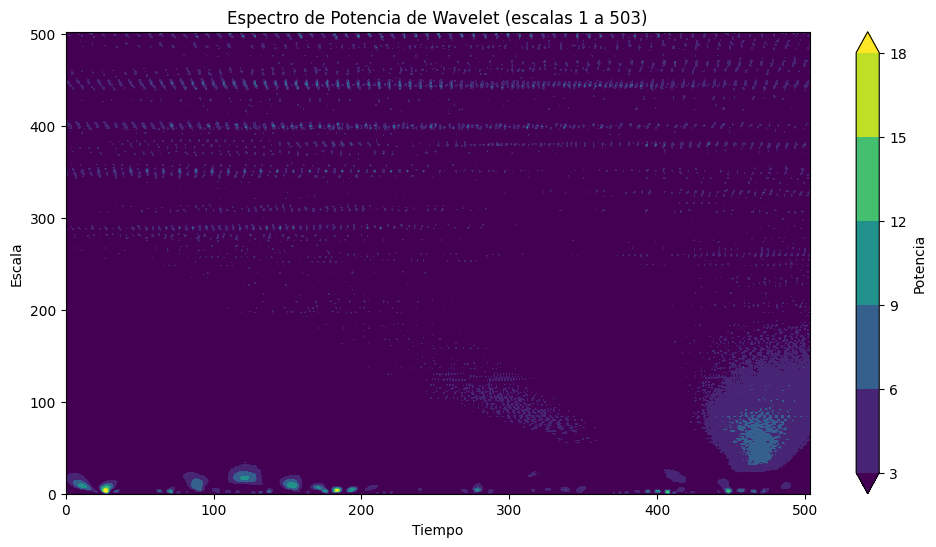

In [7]:
  import numpy as np
  import pandas as pd
  import pywt
  import matplotlib.pyplot as plt

  # Descargar los datos
  url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
  data = pd.read_csv(url, header=None)
  signal = data.values.squeeze()

  # Definir la wavelet para el sombrero mexican
  wavelet = 'mexh'

  # Definir los rangos de escalas
  rango_escalas = [np.arange(1, 11), np.arange(1, 101), np.arange(1, 504)]

  # Para cada rango de escalas
  for escalas in rango_escalas:
      # Calcular la transformada continua de wavelet
      [cfs, frequencies] = pywt.cwt(signal, escalas, wavelet)

      # Convertir a potencia
      potencia = (abs(cfs)) ** 2

      # Graficar el resultado
      plt.figure(figsize=(12, 6))
      plt.contourf(potencia, extend='both', cmap='viridis')
      plt.title(f'Espectro de Potencia de Wavelet (escalas {escalas[0]} a {escalas[-1]})')
      plt.xlabel('Tiempo')
      plt.ylabel('Escala')
      plt.colorbar(label='Potencia')
      plt.show()

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

Con respecto a la actividad 3.2, se implemneta la funcion del sombrero mexicano a un conjunto de datos reales, se realizaron 3 casos con anchos distintos para el wavelet, con la finalidad de observar el comportamiento desde un rango mas acotado a uno mayor.

Caso 1: Rango bajo, analiza la señal en un rango limitado de frecuencias, centrandose en gran parte de las caracteristicas de alta frecuencisa de la señal, con un tiempo bajo de procesamiento, arriesgando una pardida de informacion en frecuencias bajas.

Caso 2: Rango medio, al aumentar el rango de frecuencias se obtiene un analisis de tanto frecuencias altas como frecuencias bajas, a costa del tiempo de procesamiento que para este caso es poco reelebante.

caso 3: Rango alto, por utlimo los rangos mayores contienen mas informacion tanto de rangos altos como bajos, puede perder la facilidad de analisis ya que se presentan mayor cantidad de datos en pantalla.

Por lo que la elección del rango de escalas en la transformada de wavelet depende del equilibrio que desees lograr entre la resolución de la transformada (la cantidad de detalle que puedes capturar sobre la señal) y el tiempo de cálculo, por ultimo cabe recalcar que el comportamiento de la potencia es inversamente proporcional a la frecuencia.



## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/